### author: zabiralnazi@yahoo.com
> 0.40 Dropout, Augmentation, Histogram Equalization pre-processing

In [0]:
import os
# cleaning up unimportant files
def del_file(f_name):
  try:
    os.remove(f_name)
  except:
    print('file not found')

In [0]:
% cd /content/
! ls

/content
sample_data


In [0]:
# get the dataset
!wget https://challenge.kitware.com/api/v1/item/5ac37a9d56357d4ff856e176/download


Redirecting output to ‘wget-log’.


In [0]:
!ls

download  sample_data  wget-log


In [0]:
del_file('download.2')

file not found


In [0]:
!ls

download  sample_data  wget-log


In [0]:
f = open('wget-log', 'r')
log_c = f.read()
# print(log_c) # download history

In [0]:
# unzip to train_imgs folder
import zipfile
zip_ref = zipfile.ZipFile('download', 'r')
zip_ref.extractall('train_imgs')
zip_ref.close()

In [0]:
!ls

download  sample_data  train_imgs  wget-log


In [0]:
print(os.stat('download').st_size/1000000000) # GigaBytes (approx)

11.165358566


In [0]:
# get the segmentation masks
!wget https://challenge.kitware.com/api/v1/item/5ac3695656357d4ff856e16a/download


Redirecting output to ‘wget-log.1’.


In [0]:
zip_ref = zipfile.ZipFile('download.1', 'r')
zip_ref.extractall('train_masks')
zip_ref.close()

In [0]:
%cd /content/

/content


In [0]:
!ls

download    sample_data  train_masks  wget-log.1
download.1  train_imgs	 wget-log


In [0]:
# use it carefully
import shutil
try:
  #shutil.rmtree('/content/train_masks')
  #shutil.rmtree('/content/train_imgs')
  #shutil.rmtree('/content/wget-log')
  #shutil.rmtree('/content/wget-log.1')
  pass
except:
  print('folder not found')

In [0]:
print(os.stat('download.1').st_size/1000000000) # GigaBytes (approx) 

0.027402895


In [0]:
# To reproduce the results later
from numpy.random import seed
seed(1997)
from tensorflow import set_random_seed
set_random_seed(1997)

In [0]:
# load the images and the masks
import glob
img_files = []
for files in glob.glob('/content/train_imgs/ISIC2018_Task1-2_Training_Input/*.jpg'):
    img_files.append(files)

mask_files = []
for files in glob.glob('/content/train_masks/ISIC2018_Task1_Training_GroundTruth/*.png'):
    mask_files.append(files)

In [0]:
img_files.sort()
mask_files.sort()

In [0]:
print(len(img_files))
print(len(mask_files))
print(img_files[0])
print(mask_files[0])

2594
2594
/content/train_imgs/ISIC2018_Task1-2_Training_Input/ISIC_0000000.jpg
/content/train_masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0000000_segmentation.png


In [0]:
img_id = 2531
old_name = mask_files[img_id]
print(old_name)
new_name = mask_files[img_id][:-17] + '.png'
print(new_name)
print(img_files[img_id])

/content/train_masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0015998_segmentation.png
/content/train_masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0015998.png
/content/train_imgs/ISIC2018_Task1-2_Training_Input/ISIC_0015998.jpg


In [0]:
# rename all the mask images, exclude _segmentation part, Augmentor
for old_name in mask_files:
  new_name = old_name[:-17] + '.png'
  os.rename(old_name,new_name)

In [0]:
# rename image files to .png -> same extension -> augmentor
for old_name in img_files:
  new_name = old_name[:-4] + '.png'
  os.rename(old_name,new_name)

In [0]:
# load the images and the masks
import glob
img_files = []
for files in glob.glob('/content/train_imgs/ISIC2018_Task1-2_Training_Input/*.png'):
    img_files.append(files)

mask_files = []
for files in glob.glob('/content/train_masks/ISIC2018_Task1_Training_GroundTruth/*.png'):
    mask_files.append(files)

In [0]:
img_files.sort()
mask_files.sort()

In [0]:
print(len(img_files))
print(len(mask_files))
print(img_files[527])
print(mask_files[527])

2594
2594
/content/train_imgs/ISIC2018_Task1-2_Training_Input/ISIC_0002489.png
/content/train_masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0002489.png


In [0]:
from PIL import Image
import os

for files in glob.glob('/content/train_imgs/ISIC2018_Task1-2_Training_Input/*.png'):
    #img_files.append(files)
    im = Image.open(files)
    f, e = os.path.splitext(files)
    imResize = im.resize((224,224), Image.ANTIALIAS)
    imResize.save(f + '.png', 'PNG', quality=100)


for files in glob.glob('/content/train_masks/ISIC2018_Task1_Training_GroundTruth/*.png'):
    #mask_files.append(files)
    im = Image.open(files)
    f, e = os.path.splitext(files)
    imResize = im.resize((224,224), Image.ANTIALIAS)
    imResize.save(f + '.png', 'PNG', quality=100)

In [0]:
import glob
img_files = []
for files in glob.glob('/content/train_imgs/ISIC2018_Task1-2_Training_Input/*.png'):
    img_files.append(files)

mask_files = []
for files in glob.glob('/content/train_masks/ISIC2018_Task1_Training_GroundTruth/*.png'):
    mask_files.append(files)

In [0]:
img_files.sort()
mask_files.sort()

In [0]:
print(len(img_files))
print(len(mask_files))
print(img_files[2593])
print(mask_files[2593])

2594
2594
/content/train_imgs/ISIC2018_Task1-2_Training_Input/ISIC_0016072.png
/content/train_masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0016072.png


In [0]:
import cv2
a = cv2.imread('/content/train_imgs/ISIC2018_Task1-2_Training_Input/ISIC_0001103.png')
print(a.shape)

a = cv2.imread('/content/train_masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0001103.png')
print(a.shape)

(224, 224, 3)
(224, 224, 3)


In [0]:
# install augmentation library
! pip install Augmentor

In [0]:
import shutil
try:
  shutil.rmtree('/content/train_imgs/ISIC2018_Task1-2_Training_Input/output')
except:
  print('folder not found')

folder not found


In [0]:
! ls

download    sample_data  train_masks  wget-log.1
download.1  train_imgs	 wget-log


In [0]:
import Augmentor
p = Augmentor.Pipeline("/content/train_imgs/ISIC2018_Task1-2_Training_Input/")
# Point to a directory containing ground truth data.
# Images with the same file names will be added as ground truth data
# and augmented in parallel to the original data.
p.ground_truth("/content/train_masks/ISIC2018_Task1_Training_GroundTruth/")
# Add operations to the pipeline as normal:
p.rotate(probability=0.2, max_left_rotation=5, max_right_rotation=5)
p.flip_left_right(probability=0.2)
p.zoom_random(probability=0.1, percentage_area=0.8)
p.flip_top_bottom(probability=0.3)
p.gaussian_distortion(probability=0.05, grid_width=4, grid_height=4, magnitude=3, corner='bell', method='in', mex=0.5, mey=0.5, sdx=0.05, sdy=0.05)
p.random_brightness(probability=0.05, min_factor=0.7, max_factor=1.3)
p.random_color(probability=0.05, min_factor=0.6, max_factor=0.9)
p.random_contrast(probability=0.05, min_factor=0.6, max_factor=0.9)
p.random_distortion(probability=0.2, grid_width=4, grid_height=4, magnitude=2)

p.sample(2500) # change this number to generate different number of augmented variations

Executing Pipeline:   0%|          | 0/2500 [00:00<?, ? Samples/s]

Initialised with 2594 image(s) found.
Output directory set to /content/train_imgs/ISIC2018_Task1-2_Training_Input/output.2594 ground truth image(s) found.


Processing <PIL.Image.Image image mode=RGB size=224x224 at 0x7F4164276E48>: 100%|██████████| 2500/2500 [01:30<00:00, 27.69 Samples/s]


In [0]:
% cd /content

/content


In [0]:
! ls

download    sample_data  train_masks  wget-log.1
download.1  train_imgs	 wget-log


In [0]:
# % cd /content/train_imgs/ISIC2018_Task1-2_Training_Input/output
# ! ls

In [0]:
len('/content/train_imgs/ISIC2018_Task1-2_Training_Input/output/')

59

In [0]:
aug_imgs = []
aug_masks = []

aug_path = '/content/train_imgs/ISIC2018_Task1-2_Training_Input/output/*.png'

for fnam in glob.glob(aug_path):
  # print(fnam)
  if(fnam[59]=='_'): # find the proper index
    aug_masks.append(fnam)
  else:
    aug_imgs.append(fnam)

In [0]:
aug_imgs.sort()
aug_masks.sort()
print(len(aug_imgs))
print(len(aug_masks))
print(aug_imgs[7])
print(aug_masks[7])

2500
2500
/content/train_imgs/ISIC2018_Task1-2_Training_Input/output/ISIC2018_Task1-2_Training_Input_original_ISIC_0000008.png_1a3f5576-fad2-4d5a-94c8-8e0cf3c36dfe.png
/content/train_imgs/ISIC2018_Task1-2_Training_Input/output/_groundtruth_(1)_ISIC2018_Task1-2_Training_Input_ISIC_0000008.png_1a3f5576-fad2-4d5a-94c8-8e0cf3c36dfe.png


In [0]:
# reference: https://github.com/ZFTurbo/ZF_UNET_224_Pretrained_Model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.core import SpatialDropout2D, Activation
from keras import backend as K
from keras.layers.merge import concatenate
from keras.utils.data_utils import get_file

# Number of image channels (for example 3 in case of RGB, or 1 for grayscale images)
INPUT_CHANNELS = 3
# Number of output masks (1 in case you predict only one type of objects)
OUTPUT_MASK_CHANNELS = 1
# Pretrained weights


def preprocess_input(x):
    x /= 255.
    # not sure about the mean of the image distribution
    return x


def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    # +1 added to avoid 0/0 division
    return (2.0 * intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1.0)
  


def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)


def jacard_coef_loss(y_true, y_pred):
    return -jacard_coef(y_true, y_pred)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def double_conv_layer(x, size, dropout=0.40, batch_norm=True):
    if K.image_dim_ordering() == 'th':
        axis = 1
    else:
        axis = 3
    conv = Conv2D(size, (3, 3), padding='same')(x)
    if batch_norm is True:
        conv = BatchNormalization(axis=axis)(conv)
    conv = Activation('relu')(conv)
    conv = Conv2D(size, (3, 3), padding='same')(conv)
    if batch_norm is True:
        conv = BatchNormalization(axis=axis)(conv)
    conv = Activation('relu')(conv)
    if dropout > 0:
        conv = SpatialDropout2D(dropout)(conv)
    return conv


def UNET_224(dropout_val=0.40, weights=None): # No dropout by default
    if K.image_dim_ordering() == 'th':
        inputs = Input((INPUT_CHANNELS, 224, 224))
        axis = 1
    else:
        inputs = Input((224, 224, INPUT_CHANNELS))
        axis = 3
    filters = 32

    conv_224 = double_conv_layer(inputs, filters)
    pool_112 = MaxPooling2D(pool_size=(2, 2))(conv_224)

    conv_112 = double_conv_layer(pool_112, 2*filters)
    pool_56 = MaxPooling2D(pool_size=(2, 2))(conv_112)

    conv_56 = double_conv_layer(pool_56, 4*filters)
    pool_28 = MaxPooling2D(pool_size=(2, 2))(conv_56)

    conv_28 = double_conv_layer(pool_28, 8*filters)
    pool_14 = MaxPooling2D(pool_size=(2, 2))(conv_28)

    conv_14 = double_conv_layer(pool_14, 16*filters)
    pool_7 = MaxPooling2D(pool_size=(2, 2))(conv_14)

    conv_7 = double_conv_layer(pool_7, 32*filters)

    up_14 = concatenate([UpSampling2D(size=(2, 2))(conv_7), conv_14], axis=axis)
    up_conv_14 = double_conv_layer(up_14, 16*filters)

    up_28 = concatenate([UpSampling2D(size=(2, 2))(up_conv_14), conv_28], axis=axis)
    up_conv_28 = double_conv_layer(up_28, 8*filters)

    up_56 = concatenate([UpSampling2D(size=(2, 2))(up_conv_28), conv_56], axis=axis)
    up_conv_56 = double_conv_layer(up_56, 4*filters)

    up_112 = concatenate([UpSampling2D(size=(2, 2))(up_conv_56), conv_112], axis=axis)
    up_conv_112 = double_conv_layer(up_112, 2*filters)

    up_224 = concatenate([UpSampling2D(size=(2, 2))(up_conv_112), conv_224], axis=axis)
    up_conv_224 = double_conv_layer(up_224, filters, dropout_val)

    conv_final = Conv2D(OUTPUT_MASK_CHANNELS, (1, 1))(up_conv_224)
    conv_final = Activation('sigmoid')(conv_final)

    model = Model(inputs, conv_final, name="UNET_224")


    return model

Using TensorFlow backend.


In [0]:
#img_files.extend(aug_imgs)
#mask_files.extend(aug_masks)

In [0]:
print(len(img_files))
print(len(mask_files))
print(img_files[2000])
print(mask_files[2000])

2594
2594
/content/train_imgs/ISIC2018_Task1-2_Training_Input/ISIC_0014422.png
/content/train_masks/ISIC2018_Task1_Training_GroundTruth/ISIC_0014422.png


In [0]:
import cv2
import random
import numpy as np
import pandas as pd
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import __version__

img_files.sort()
mask_files.sort()

print('Updated States ...')
img_arr = []
mask_arr = []
num_train = len(img_files)
global gen_batch 

Updated States ...


In [0]:
! ls

download    sample_data  train_masks  wget-log.1
download.1  train_imgs	 wget-log


In [0]:
import random
random.seed(1997) # same seed again
for i in range(num_train):
    a = cv2.imread(img_files[i])
    a = cv2.resize(a, (224, 224)) 
    a = np.array(a,dtype=np.uint8)
    img_arr.append(a)

    b = cv2.imread(mask_files[i],0)
    b = cv2.resize(b, (224, 224)) 
    b = np.array(b,dtype=np.uint8)
    mask_arr.append(b)
gen_batch = 0

fin_arr = list(zip(img_arr,mask_arr))
random.shuffle(fin_arr)
img_arr = [x[0] for x in fin_arr]
mask_arr = [x[1] for x in fin_arr]

In [0]:
tot_data = len(img_arr)
print(tot_data)
train_split = 0.7
validation_split = 0.7 + 0.15
test_split = 0.7 + 0.15 + 0.15

train_img = img_arr[:int(tot_data*train_split)]
validation_img = img_arr[int(tot_data*train_split):int(tot_data*validation_split)]
test_img = img_arr[int(tot_data*validation_split):]

train_mask = mask_arr[:int(tot_data*train_split)]
validation_mask = mask_arr[int(tot_data*train_split):int(tot_data*validation_split)]
test_mask = mask_arr[int(tot_data*validation_split):]

print(len(train_img))
print(len(train_mask))

print(len(validation_img))
print(len(validation_mask))

print(len(test_img))
print(len(test_mask))

2594
1815
1815
389
389
390
390


In [0]:
len(aug_imgs)

2500

In [0]:
len(aug_masks)

2500

In [0]:
# load augmented images
num_train = len(aug_imgs)
img_arr = []
mask_arr = []
for i in range(num_train):
    a = cv2.imread(aug_imgs[i])
    a = cv2.resize(a, (224, 224)) 
    a = np.array(a,dtype=np.uint8)
    img_arr.append(a)

    b = cv2.imread(aug_masks[i],0)
    b = cv2.resize(b, (224, 224)) 
    b = np.array(b,dtype=np.uint8)
    mask_arr.append(b)
gen_batch = 0

fin_arr = list(zip(img_arr,mask_arr))
random.shuffle(fin_arr)
img_arr = [x[0] for x in fin_arr]
mask_arr = [x[1] for x in fin_arr]

In [0]:
print(len(img_arr))
print(len(mask_arr))
print(img_arr[0].shape)
print(mask_arr[0].shape)

2500
2500
(224, 224, 3)
(224, 224)


In [0]:
# use it carefully, num_samples*0.8
ns_t = int(len(aug_masks)*0.8)
train_img.extend(img_arr[0:ns_t])
train_mask.extend(mask_arr[0:ns_t])

validation_img.extend(img_arr[ns_t:])
validation_mask.extend(mask_arr[ns_t:])

In [0]:
print(len(train_img))
print(len(train_mask))
print(len(validation_img))
print(len(validation_mask))

3815
3815
889
889


In [0]:
train_img = np.array(train_img, dtype = 'float32')
train_img = preprocess_input(train_img)
validation_img = np.array(validation_img, dtype = 'float32')
validation_img = preprocess_input(validation_img)
test_img = np.array(test_img, dtype = 'float32')
test_img = preprocess_input(test_img)

In [0]:
print(np.max(train_img[0]))
print(np.max(validation_img[0]))
print(np.max(test_img[0]))

0.89411765
0.81960785
0.9372549


In [0]:
train_mask = np.array(train_mask, dtype = 'float32')
train_mask = preprocess_input(train_mask)
validation_mask = np.array(validation_mask, dtype = 'float32')
validation_mask = preprocess_input(validation_mask)
test_mask = np.array(test_mask, dtype = 'float32')
test_mask = preprocess_input(test_mask)

In [0]:
print(np.max(train_mask[0]))
print(np.max(validation_mask[0]))
print(np.max(test_mask[0]))

1.0
1.0
1.0


In [0]:
print(train_img[0].shape)
print(train_mask[0].shape)

(224, 224, 3)
(224, 224)


In [0]:
print(train_mask.shape)
n_s, r, c = train_mask.shape
train_mask = train_mask.reshape(n_s, r, c, 1)
print(train_mask.shape)

(3815, 224, 224)
(3815, 224, 224, 1)


In [0]:
print(validation_mask.shape)
n_s, r, c = validation_mask.shape
validation_mask = validation_mask.reshape(n_s, r, c, 1)
print(validation_mask.shape)

(889, 224, 224)
(889, 224, 224, 1)


In [0]:
print(test_mask.shape)
n_s, r, c = test_mask.shape
test_mask = test_mask.reshape(n_s, r, c, 1)
print(test_mask.shape)

(390, 224, 224)
(390, 224, 224, 1)


In [0]:
from keras.models import load_model
from keras.optimizers import Adam
import os

out_model_path = 'unet_224_final_model.h5'
epochs = 100
patience = 20
batch_size = 32
optim_type = 'Adam'
learning_rate = 0.001
model = UNET_224()
if os.path.isfile(out_model_path):
    model.load_weights(out_model_path)

if optim_type == 'SGD':
    optim = SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
else:
    optim = Adam(lr=learning_rate)
model.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef, jacard_coef])


model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_47 (Conv2D)              (None, 224, 224, 32) 896         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 224, 224, 32) 128         conv2d_47[0][0]                  
__________________________________________________________________________________________________
activation_47 (Activation)      (None, 224, 224, 32) 0           batch_normalization_45[0][0]     
__________________________________________________________________________________________________
conv2d_48 

In [0]:
from keras.models import load_model
import os

out_model_path = 'unet_224_final_model.h5'
epochs = 100
patience = 20
batch_size = 32
optim_type = 'Adam'
learning_rate = 0.001
model = UNET_224()
if os.path.isfile(out_model_path):
    model.load_weights(out_model_path)

if optim_type == 'SGD':
    optim = SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
else:
    optim = Adam(lr=learning_rate)
model.compile(optimizer=optim, loss=dice_coef_loss, metrics=[dice_coef, jacard_coef])

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-9, epsilon=0.00001, verbose=1, mode='min'),
    #EarlyStopping(monitor='val_loss', patience=patience, verbose=0),
    ModelCheckpoint('unet_224_best_weight.h5', monitor='val_loss', save_best_only=True, verbose=1),
]

print('Training Init()')
history = model.fit(
    x = train_img,
    y = train_mask,
    batch_size = batch_size,
    epochs=epochs,
    #steps_per_epoch= 1815//batch_size,
    validation_data= (validation_img, validation_mask),
    #validation_steps= 389//16,
    verbose=1,
    callbacks=callbacks)

model.save(out_model_path)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:928: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` insted.
  warnings.warn('`epsilon` argument is deprecated and '


Training Init()
Train on 3815 samples, validate on 889 samples
Epoch 1/100
3815/3815 [==============================] - 219s 57ms/step - loss: -0.6068 - dice_coef: 0.6068 - jacard_coef: 0.4406 - val_loss: -0.5632 - val_dice_coef: 0.5632 - val_jacard_coef: 0.3930

Epoch 00001: val_loss improved from inf to -0.56323, saving model to unet_224_best_weight.h5
Epoch 2/100
3815/3815 [==============================] - 196s 51ms/step - loss: -0.7011 - dice_coef: 0.7011 - jacard_coef: 0.5420 - val_loss: -0.6594 - val_dice_coef: 0.6594 - val_jacard_coef: 0.4939

Epoch 00002: val_loss improved from -0.56323 to -0.65941, saving model to unet_224_best_weight.h5
Epoch 3/100
3815/3815 [==============================] - 195s 51ms/step - loss: -0.7344 - dice_coef: 0.7344 - jacard_coef: 0.5830 - val_loss: -0.7583 - val_dice_coef: 0.7583 - val_jacard_coef: 0.6119

Epoch 00003: val_loss improved from -0.65941 to -0.75829, saving model to unet_224_best_weight.h5
Epoch 4/100
3815/3815 [======================

In [0]:
type(history.history)

dict

In [0]:
model_hist = history.history
np.save('model.hist.npy',model_hist)

In [0]:
!ls

download    model.hist.npy  train_imgs	 unet_224_best_weight.h5  wget-log
download.1  sample_data     train_masks  unet_224_final_model.h5  wget-log.1


In [0]:
from google.colab import files
files.download('model.hist.npy')

In [0]:
y_test = model.predict(test_img)

In [0]:
print(y_test.shape)

(390, 224, 224, 1)


In [0]:
def dice_coef_eval(y_true, y_pred):
    y_p = y_pred.flatten()
    #print(y_p.shape)
    y_b = y_true.flatten()
    #print(y_b.shape)
    cc = np.dot(y_p,y_b)
    #print(cc)
    ps = np.sum(y_p)
    pb = np.sum(y_b)
    ds = (2.0*cc + 1.0)/(ps+pb+1.0)
    #print(type(ds))
    return ds
  
def jacard_coef_eval(y_true, y_pred):
    y_p = y_pred.flatten()
    #print(y_p.shape)
    y_b = y_true.flatten()
    #print(y_b.shape)
    cc = np.dot(y_p,y_b)
    #print(cc)
    ps = np.sum(y_p)
    pb = np.sum(y_b)
    js = (cc + 1.0)/(ps+pb-cc+1.0)
    #print(type(ds))
    return js

In [0]:
# binary conversion
y_test[y_test<0.5] = 0.0
y_test[y_test>=0.5] = 1.0

In [0]:
dice_score_test = []
jacard_score_test = []

n_s, r, c, ch = y_test.shape
for i in range(n_s):
  dice_score_test.append(dice_coef_eval(y_test[i,:,:,:], test_mask[i,:,:,:]))
  jacard_score_test.append(jacard_coef_eval(y_test[i,:,:,:], test_mask[i,:,:,:]))

In [0]:
print(dice_score_test)
print(jacard_score_test)

[0.8633537054871867, 0.7593491912172045, 0.21918485502997162, 0.8724706742855598, 0.9311120024318164, 0.8800933741264689, 0.7647080911477552, 0.9187787620975666, 0.9058847863750487, 0.944747771531199, 0.8516688126178217, 0.9438062530068227, 0.9746040380519491, 0.9706092317119945, 0.982727725858924, 0.5392609643412903, 0.9448466693186988, 0.8976198751514445, 0.917430966521893, 0.9180950636440096, 0.8427417702362842, 0.8826802261645091, 0.6148983452710803, 0.9600329222972496, 0.9759405524792791, 0.924429510874868, 0.7103527789702776, 0.9506114491195915, 0.8638386419743207, 0.9456712016492484, 0.5113398452162365, 0.875639601820212, 0.9048342458384517, 0.9220949143423128, 0.7844915943986515, 0.8890951562163089, 0.5804397389736784, 0.8964050264784194, 0.8796106133174859, 0.9160806932717892, 0.9133162117579533, 0.9323690743205589, 0.8505183949014631, 0.934477881711057, 0.9496087347298293, 0.960273129194397, 0.8647655673951498, 0.962991759167703, 0.9473403285317328, 0.7901145314701443, 0.9627

In [0]:
print(np.max(dice_score_test))
print(np.min(dice_score_test))
print(np.mean(dice_score_test))

print(np.max(jacard_score_test))
print(np.min(jacard_score_test))
print(np.mean(dice_score_test))

0.9834925556773575
0.0002038877856581867
0.873570896930719
0.9675223705264746
0.0002038877856581867
0.873570896930719


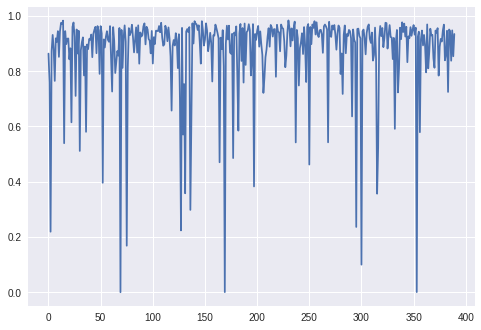

In [0]:
import matplotlib.pyplot as plt
plt.plot(dice_score_test)

In [0]:
ind = np.unravel_index(np.argmin(dice_score_test, axis=None), len(dice_score_test))
print(ind)
ind2 = np.unravel_index(np.argmin(jacard_score_test, axis=None), len(jacard_score_test))
print(ind2)

(69,)
(69,)


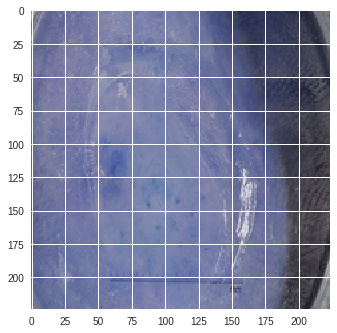

In [0]:
import matplotlib.pyplot as plt
a = test_img[69]
plt.imshow(a)

In [0]:
y_test.shape

(390, 224, 224, 1)

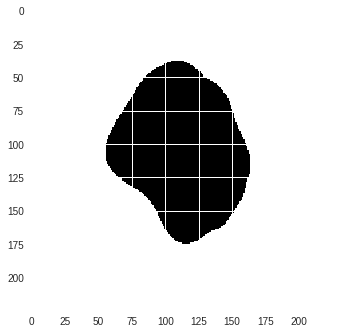

In [0]:
a = y_test[1,:,:,:].reshape(224,224)
plt.imshow(a)

In [0]:
np.save('img_test.npy', test_img)
np.save('img_mask.npy', test_mask)
np.save('y_predicted_test.npy', y_test)

In [0]:
!ls

download      model.hist.npy  unet_224_best_weight.h5  y_predicted_test.npy
download.1    sample_data     unet_224_final_model.h5
img_mask.npy  train_imgs      wget-log
img_test.npy  train_masks     wget-log.1


In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive

In [0]:
# saving to google drive for backup


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'img_mask_drop_aug.npy'})
uploaded.SetContentFile('img_mask.npy')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1HxdsITGxbNG2R6y8-UDlqBZg4iWsPYA7


In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'img_test_drop_aug.npy'})
uploaded.SetContentFile('img_test.npy')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1qrMQa1t9r3dQZolYmwa6HEqzBWIsrQFc


In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'y_predicted_test_drop_aug.npy'})
uploaded.SetContentFile('y_predicted_test.npy')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 151Rncx_uDNa4UbQXMQhprmVWcf5MCZJs


In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model.hist_drop_aug.npy'})
uploaded.SetContentFile('model.hist.npy')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1hTXTaqgVLxyaV2J1YofEssWY66vGrUak


In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'unet_224_best_weight_drop_aug.h5'})
uploaded.SetContentFile('unet_224_best_weight.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1kp1DmVFtWD9-P_0sF5f_nVqAaTCNLu8w


In [0]:
# Create & upload a file.
uploaded = drive.CreateFile({'title': 'unet_224_final_model_drop_aug.h5'})
uploaded.SetContentFile('unet_224_final_model.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

Uploaded file with ID 1W47B_Dt7b-FGczbMC8C7q10lEETgIQ26


In [0]:
# img_mask
# https://drive.google.com/open?id=1t7-wJjzUteuGAOnVWeEnCsOIe7aj3U3g
# img_test
# https://drive.google.com/open?id=1XDzdT7ERkHeqrTg8JxGv9b_VVmdZONqM
# model.history
# https://drive.google.com/open?id=18ybbnkQ1yV-Z7TmnMOg12179EpkpraDg
# unet_224_final_model
# https://drive.google.com/open?id=1gETJeGjMOTUSbmwv553lZAGK5RkD_gm6
# unet_224_best_weight
# https://drive.google.com/open?id=1cgE3duyxiyv6NgfT2hWE0yQoMPvCuGdx